# 13장 최단 경로 문제

> 최단 경로 문제는 각 간선의 가중치 합이 최소가 되는 두 정점(또는 노드) 사이의 경로를 찾는 문제입니다.

최단 경로는 지도 상의 한 지점에서 다른 지점으로 갈 때 가장 빠른 길을 찾는 것과 비슷한 문제입니다.

쉽게 말해 내비게이션에서 목적지로 이동할 때, 경로 탐색을 하면 나오는 최적의 경로 문제가 바로 최소 비용이 되는 최단 경로 문제다.

정점 (Vertex)은 교차로에 해당하고, 간선 (Edge)은 길에 해당한다.
가중치 (Weight)는 거리나 시간과 같은 이동 비용에 해당한다.


# 40. 네트워크 딜레이 타임

K부터 출발해 모든 노드가 신호를 받을 수 있는 시간을 계산하라. 불가능할 경우 -1을 리턴한다. 입력값 (u, v, w)는각각출발지 도착지 소요 시간으로 구성되며 전체 노드의 개수는 N으로 입력받는다.

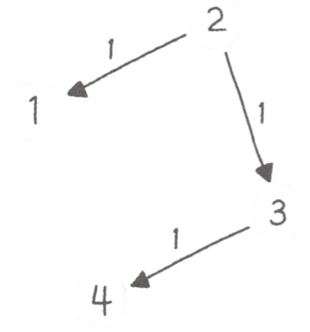

- 입력 : times = [[2, 1, 1], [2, 3, 1], [3, 4, 1]], N = 4, K = 2

- 출력 : 2

### 풀이 1. 다익스트라 알고리즘 구현

1. 모든 노드가 신호를 받는 데 걸리는 시간
2. 모든 노드에 도달할 수 있는지 여부

위 2가지 사항을 판별해야합니다.

첫 번째로 판별해야하는 모든 노드가 신호를 받는 데 걸리는 시간이란, 가장 오래 걸리는 노드까지의 시간이라고 할 수 있습니다. 즉 가장 오래 걸리는 노드까지의 최단 시간을 의미하며, 이는 앞서 설명한 다익스트라 알고리즘으로 추출 할 수 있습니다.

두 번째로 모든 노드에 도달할 수 있는지 여부입니다. 이는 모든 노드의 다익스트라 알고리즘 계산 값이 존재하는지 유무로 판별할 수 있습니다.

In [6]:
from typing import List

from collections import defaultdict
import heapq

def networkDelayTime(times: List[List[int]], N: int, K: int) -> int:
    graph = collections.defaultdict(list)

    # 그래프 인접 리스트 구성
    for u, v, w in times:
        graph[u].append((v, w))

    # 큐 변수 : [((소요 시간, 정점))] 구조로 구성
    Q = [(0, K)] # 즉, 시작점에서 '정점'까지의 소요 시간을 담아둘 것 / 초기값은 시작점 K부터이므로, 소요시간은 0
    dist = collections.defaultdict(int) # dist는 거리를 의미

    # 우선 순위 큐 최소값 기준으로 정점까지 최단 경로 삽입 
    while Q:
        time, node = heapq.heappop(Q)
        if node not in dist:
            dist[node] = time
            for v, w in graph[node]:
                alt = time + w
                heapq.heappush(Q, (alt, v))

    # 모든 노드 최단 경로 존재 여부 판별
    if len(dist) == N:
        return max(dist.values())

    return -1

In [7]:
print(networkDelayTime([[2, 1, 1], [2, 3, 1], [3, 4, 1]], 4, 2))

2


# 41. K 경유지 내 가장 저렴한 항공권

시작점에서 도착점까지의 가장 저렴한 가격을 계산하되, K 개의 경유지 이내에 도착하는 가격을 리턴하라. 경로가 존재하지 않을 경우 -1을 리턴한다.

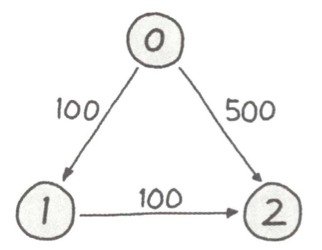

- 입력 :
n = 3, edges = [[0, 1, 100], [1, 2, 100], [0, 2, 500]]
src = 0, dst = 2, k = 0

- 출력 :
500

- 설명 :
시작점 src 노드 0에서 도착점 dst 노드 2까지 최저가는 0->1->2 경로인 200이지만, 여기서는 입력값이 K= 0으로 경유지가 하나도 없어야 하므로 이 조건을 만족하는 최저 가는 0-2인 500 이다.


### 풀이 1. 다익스트라 알고리즘 응용

In [8]:
def findCheapestPrice(n: int, flights: List[List[int]], src: int, dst: int, K: int) -> int:
    graph = collections.defaultdict(list)
    # 그래프 인접 리스트 구성
    for u, v, w in flights:
        graph[u].append((v, w))

    # 큐 변수: [(가격, 정점, 남은 가능 경유지 수)]
    Q = [(0, src, K)] # 비용, 시작노드, 경유지 수로 이루어지 Q 생성

    # 우선 순위 큐 최소값 기준으로 도착점까지 최소 비용 판별
    while Q:
        price, node, k = heapq.heappop(Q) # 초기값 (0, 시작노드,0)
        if node == dst: # 도착지에 도착했을 때
            return price
        if k >= 0: # 경유가능한 최대 개수부터 1개씩 줄이는 방식
            for v, w in graph[node]:
                alt = price + w
                heapq.heappush(Q, (alt, v, k - 1))
                
    return -1 # 모두 경유할 수 없는 경우

In [9]:
print(findCheapestPrice(3, [[0, 1, 100], [1, 2, 100], [0, 2, 500]], 0, 2, 0))

500
